# Movies Dataset

A project about correlation of variables.

In [2]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#inline magic function to make plot outputs appear and be stored within the notebook
%matplotlib inline
# Adjust the configurations of plots
matplotlib.rcParams['figure.figsize'] = (12,8) 

In [3]:
#Read in the data

df= pd.read_csv(r'C:\Users\ASUS\Downloads\movies\movies.csv')

In [55]:
#Discover movies
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0


In [5]:
#Missing data

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
#fill missing data with mean (numeric variables)
print(df.mean(numeric_only=True))


year       2.000405e+03
score      6.390411e+00
votes      8.810850e+04
budget     3.558988e+07
gross      7.850054e+07
runtime    1.072616e+02
dtype: float64


In [12]:
# Data types of columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [57]:
#change types
df['released']= df['released'].astype(str)

#Create correct release year column 
df['release_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype('str')


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


In [59]:
# Sort by gross profit
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


In [18]:
#show all data
pd.set_option('display.max_rows', None)

In [60]:
#check duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
df.head()
#drop duplicates
#df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


Studying correlations: What are the factors that influence high gross profit?
Assumptions: High budget, company Reputation


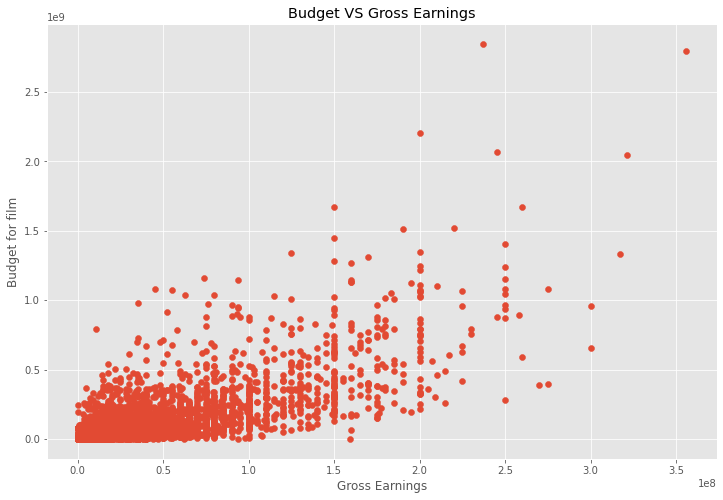

In [30]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

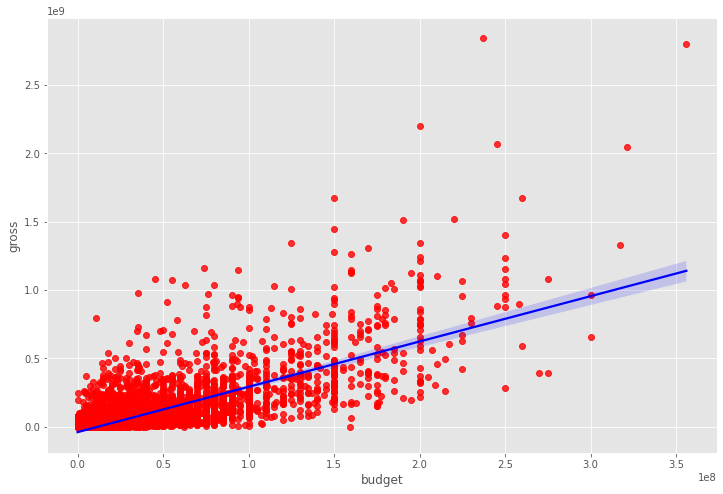

In [37]:
#Plot budget vs gross using seaborn, regression

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})


In [42]:
#Correlations methods: Pearson, kendall,spearman
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


There is high correlation between budget and gross (0.711)

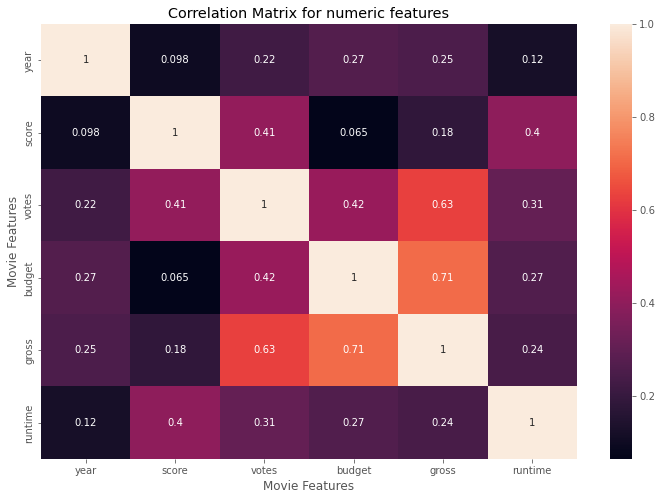

In [44]:
#correlation matrix for numerical variables

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [45]:
#Studying production companies

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [49]:
#Converting catagorical variables to numerical

df_num= df

for col_name in df_num.columns:
    if(df_num[col_name].dtype=='object'): 
        df_num[col_name]= df_num[col_name].astype('category')
        df_num[col_name]= df_num[col_name].cat.codes
df_num.head()     

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0


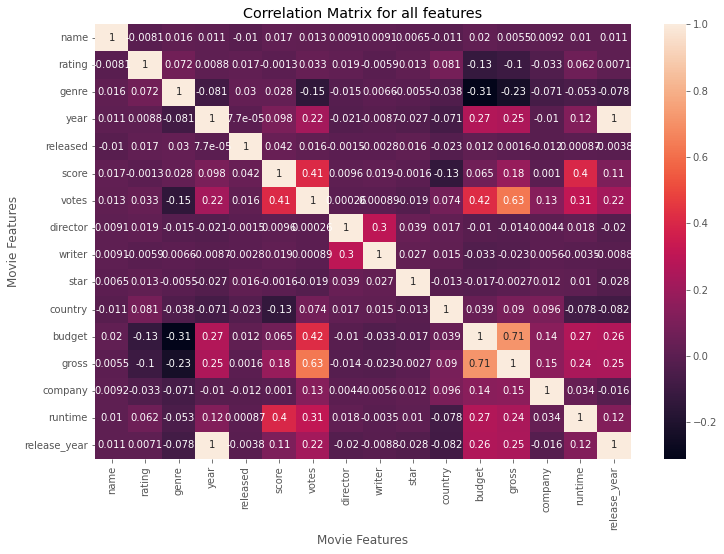

In [50]:
#correlation matrix for all variables after conversion

correlation_matrix = df_num.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for all features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

Higher votes reflects a movie's high gross earnings. A company's reputaion has low effect on the gross earnings.

In [52]:
#Unstacking correlations
corr_matrix= df_num.corr()
corr_pairs=corr_matrix.unstack().sort_values()

corr_pairs

genre         budget         -0.310566
budget        genre          -0.310566
genre         gross          -0.230267
gross         genre          -0.230267
votes         genre          -0.145276
genre         votes          -0.145276
score         country        -0.133343
country       score          -0.133343
rating        budget         -0.126046
budget        rating         -0.126046
gross         rating         -0.102116
rating        gross          -0.102116
release_year  country        -0.082274
country       release_year   -0.082274
year          genre          -0.081261
genre         year           -0.081261
country       runtime        -0.078297
runtime       country        -0.078297
genre         release_year   -0.077550
release_year  genre          -0.077550
genre         company        -0.071067
company       genre          -0.071067
year          country        -0.070938
country       year           -0.070938
genre         runtime        -0.052699
runtime       genre      

In [54]:
#high correlations
high_corr= corr_pairs[(corr_pairs)>0.5]
high_corr

votes         gross           0.628713
gross         votes           0.628713
budget        gross           0.711270
gross         budget          0.711270
release_year  year            0.997295
year          release_year    0.997295
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
dtype: float64

Votes & budget have the highest correlation to gross earnings. Company has low correlation to gross earnings. 